# 1.. Data Collection : 

# Data - S&P 500 stock data

### Dataset-->> https://www.kaggle.com/camnugent/sandp500

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
### since we have used 'os' package already in youtube case-study , 
## lets use glob this time ..

In [3]:
import glob

In [4]:

### ie ,at this path 'G:\EDA_projects\Stock_Data\individual_stocks_5yr\individual_stocks_5yr'
### I need all the csv files..

glob.glob(r'G:\EDA_projects\Stock_Data\individual_stocks_5yr\
                individual_stocks_5yr/*csv')

['G:\\EDA_projects\\Stock_Data\\individual_stocks_5yr\\individual_stocks_5yr\\AAL_data.csv',
 'G:\\EDA_projects\\Stock_Data\\individual_stocks_5yr\\individual_stocks_5yr\\AAPL_data.csv',
 'G:\\EDA_projects\\Stock_Data\\individual_stocks_5yr\\individual_stocks_5yr\\AAP_data.csv',
 'G:\\EDA_projects\\Stock_Data\\individual_stocks_5yr\\individual_stocks_5yr\\ABBV_data.csv',
 'G:\\EDA_projects\\Stock_Data\\individual_stocks_5yr\\individual_stocks_5yr\\ABC_data.csv',
 'G:\\EDA_projects\\Stock_Data\\individual_stocks_5yr\\individual_stocks_5yr\\ABT_data.csv',
 'G:\\EDA_projects\\Stock_Data\\individual_stocks_5yr\\individual_stocks_5yr\\ACN_data.csv',
 'G:\\EDA_projects\\Stock_Data\\individual_stocks_5yr\\individual_stocks_5yr\\ADBE_data.csv',
 'G:\\EDA_projects\\Stock_Data\\individual_stocks_5yr\\individual_stocks_5yr\\ADI_data.csv',
 'G:\\EDA_projects\\Stock_Data\\individual_stocks_5yr\\individual_stocks_5yr\\ADM_data.csv',
 'G:\\EDA_projects\\Stock_Data\\individual_stocks_5yr\\individual_s

#### The tech stocks we'll use for this analysis--
    Apple
    Amazon
    Google
    Microsoft

In [5]:
### in the utube case-study , we have used pd.concat() to collect data
## from various files ..
## so this time , lets use pd.append() to do same task..

In [6]:


company_list=[
             r'G:\\EDA_projects\\Stock_Data\\individual_stocks_5yr\\individual_stocks_5yr\\AAPL_data.csv',
             r'G:\\EDA_projects\\Stock_Data\\individual_stocks_5yr\\individual_stocks_5yr\\AMZN_data.csv',
             r'G:\\EDA_projects\\Stock_Data\\individual_stocks_5yr\\individual_stocks_5yr\\GOOG_data.csv',
             r'G:\\EDA_projects\\Stock_Data\\individual_stocks_5yr\\individual_stocks_5yr\\MSFT_data.csv'
             ]


# blank dataframe

all_data = pd.DataFrame()
for file in company_list:
    current_df = pd.read_csv(file)
    all_data=current_df.append(all_data , ignore_index=True)



In [7]:
all_data.head()

date   open   high    low  close    volume  Name
0  2013-02-08  27.35  27.71  27.31  27.55  33318306  MSFT
1  2013-02-11  27.65  27.92  27.50  27.86  32247549  MSFT
2  2013-02-12  27.88  28.00  27.75  27.88  35990829  MSFT
3  2013-02-13  27.93  28.11  27.88  28.03  41715530  MSFT
4  2013-02-14  27.92  28.06  27.87  28.04  32663174  MSFT

In [8]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [9]:
all_data['date'] = pd.to_datetime(all_data['date'])

In [10]:
all_data['date'][0]

Timestamp('2013-02-08 00:00:00')

In [11]:
all_data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

#  2.. What was the change in price of the stock overtime?

In [12]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [13]:
tech_list = all_data['Name'].unique()

In [14]:
tech_list

array(['MSFT', 'GOOG', 'AMZN', 'AAPL'], dtype=object)

In [15]:
for i, company in enumerate(tech_list,1):
    print(type(company))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


#### using matploltlib lineplot

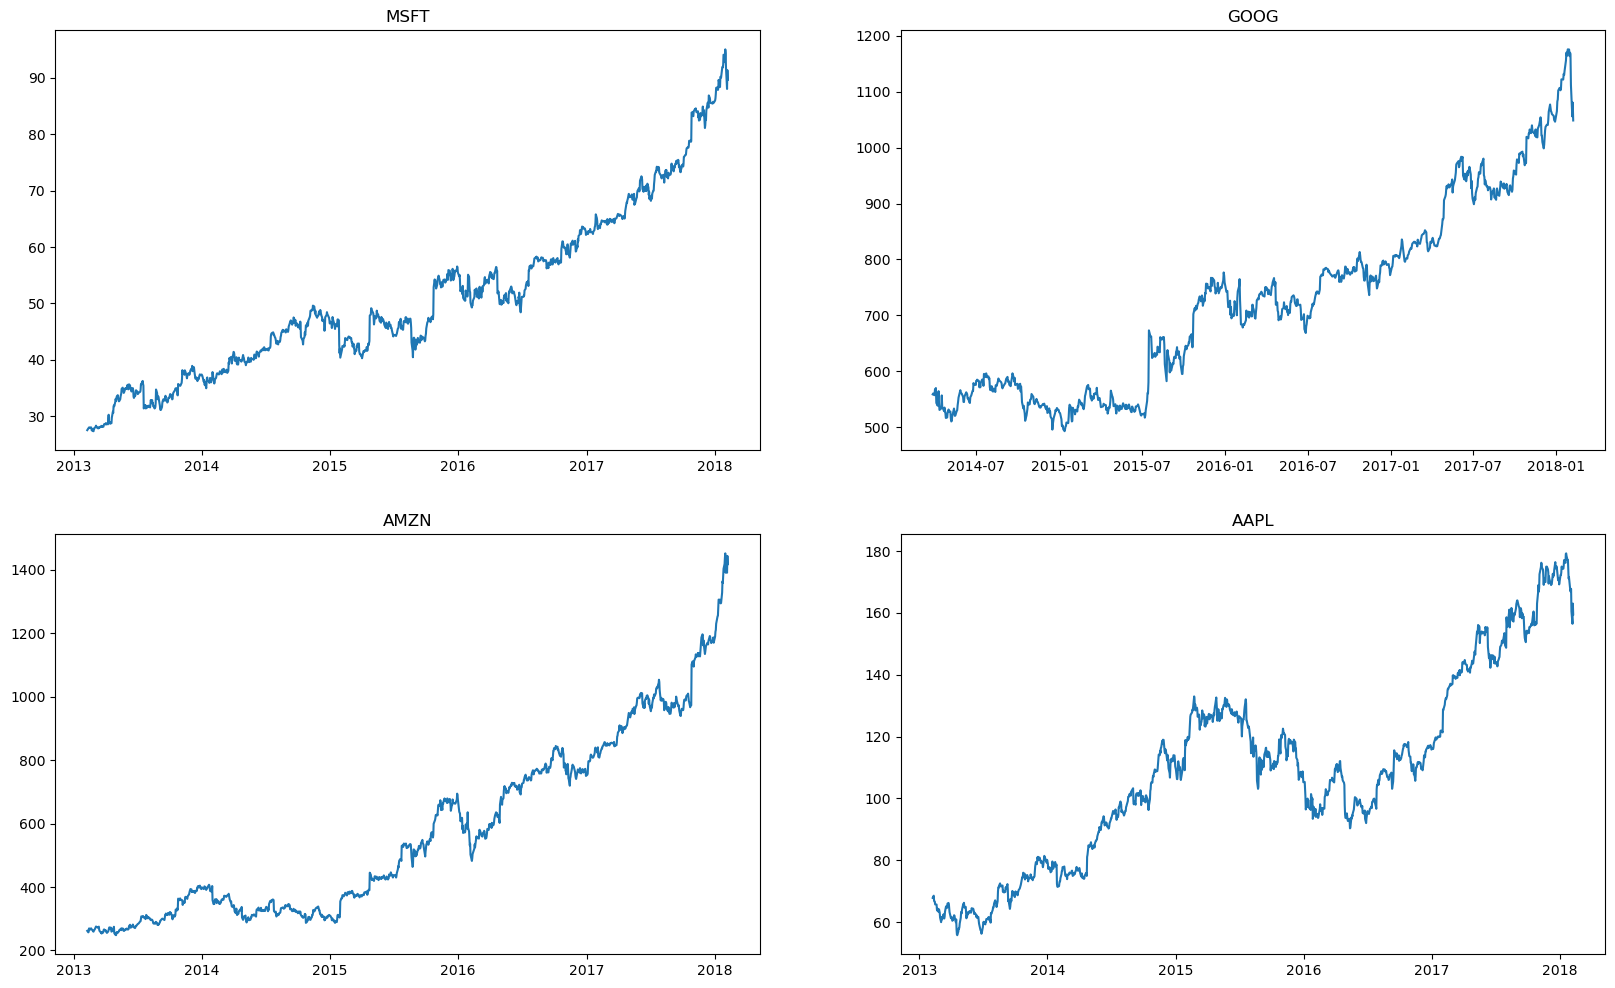

In [16]:
plt.figure(figsize=(20,12))
for i, company in enumerate(tech_list,1):
    plt.subplot(2, 2, i)
    df=all_data[all_data['Name']==company]
    plt.plot(df['date'],df['close'])
    plt.title(company)

## 3.. What was the moving average of the various stocks?

In [17]:
all_data.head(3)

date   open   high    low  close    volume  Name
0 2013-02-08  27.35  27.71  27.31  27.55  33318306  MSFT
1 2013-02-11  27.65  27.92  27.50  27.86  32247549  MSFT
2 2013-02-12  27.88  28.00  27.75  27.88  35990829  MSFT

In [18]:
all_data['close'].rolling(10).mean()

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
4747    171.948
4748    170.152
4749    168.101
4750    166.700
4751    165.232
Name: close, Length: 4752, dtype: float64

In [19]:
new_data = all_data.copy()

In [20]:
#### now lets consider different windows of rolling ,
## ie 10 days ,20 days ,30 days 

In [21]:
ma_day = [10, 20, 50]

for ma in ma_day:
    new_data['close'+'_'+str(ma)] = new_data['close'].\
                                        rolling(ma).mean()

In [22]:
new_data.tail(5)

date     open    high       low   close    volume  Name  close_10  \
4747 2018-02-01  167.165  168.62  166.7600  167.78  47230787  AAPL   171.948   
4748 2018-02-02  166.000  166.80  160.1000  160.50  86593825  AAPL   170.152   
4749 2018-02-05  159.100  163.88  156.0000  156.49  72738522  AAPL   168.101   
4750 2018-02-06  154.830  163.72  154.0000  163.03  68243838  AAPL   166.700   
4751 2018-02-07  163.085  163.40  159.0685  159.54  51608580  AAPL   165.232   

      close_20  close_50  
4747  173.8700  172.8252  
4748  173.2435  172.6356  
4749  172.3180  172.3026  
4750  171.7520  172.0640  
4751  171.0125  171.7554

In [23]:
new_data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name', 'close_10',
       'close_20', 'close_50'],
      dtype='object')

In [24]:
new_data['Name'].unique()

array(['MSFT', 'GOOG', 'AMZN', 'AAPL'], dtype=object)

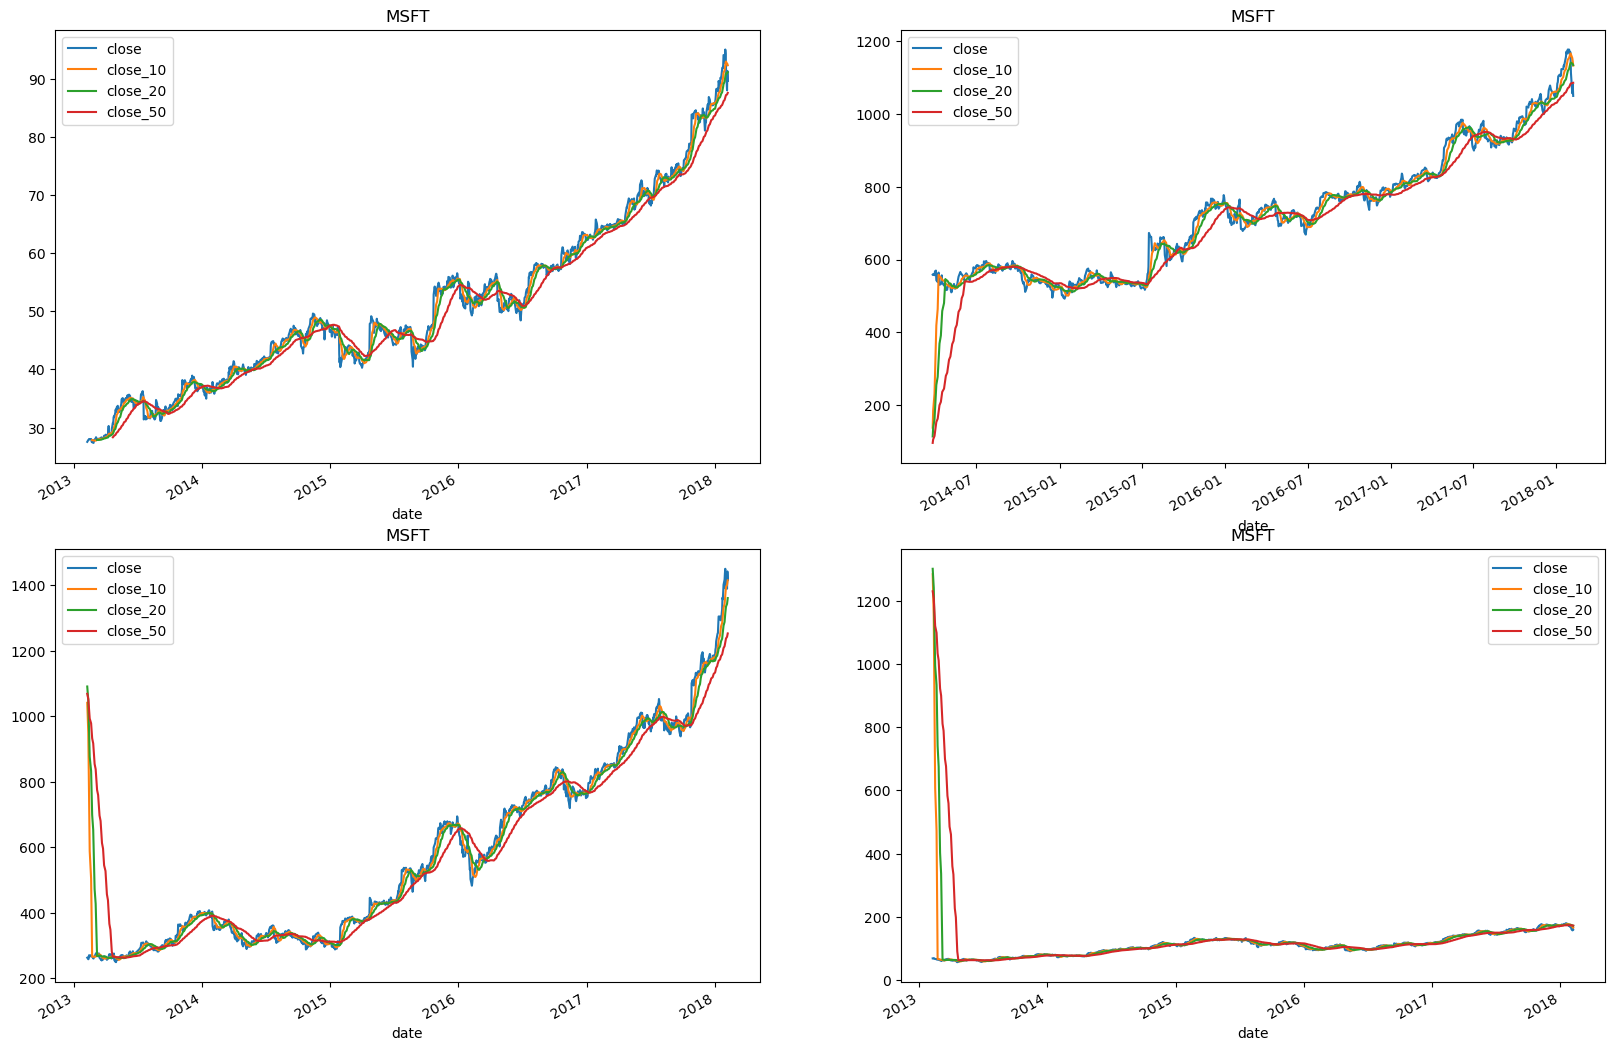

In [25]:
plt.figure(figsize = (20,14))
for index , company in enumerate(new_data['Name'].unique() , 1):
    plt.subplot(2,2,index)
    current_df = new_data[new_data['Name']==company]
    current_df.set_index('date')[['close','close_10','close_20',\
                                  'close_50']].plot(ax=plt.gca())
    plt.title('MSFT')

## 4.. analyse Closing price change in apple stock

##### Daily Stock Return Formula
    To calculate how much you gained or lost per day for a stock, 
    subtract the opening price from the closing price. Then, 
    multiply the result by the number of shares you own in the company. 

In [26]:
apple = pd.read_csv('G:\EDA_projects\Stock_Data\individual_stocks_5yr\
                                individual_stocks_5yr/AAPL_data.csv')
apple.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [27]:
apple['close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: close, Length: 1259, dtype: float64

##### How to compute percentage return
    1..using pct_Change ( Pandas )
    2..by shifting values & doing basic arithmetics..
    3..own logic (code completely from scratch)

In [28]:
apple['close'].pct_change() * 100

### Percentage change between the current and a prior element.


## (df['close'] - df['close'].shift(1))/df['close'].shift(1) * 100

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: close, Length: 1259, dtype: float64

In [29]:
apple['Daily Return (in %)'] = apple['close'].pct_change()\
                                                    * 100 

In [30]:
apple.head(3)

date     open     high      low    close     volume  Name  \
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   

   Daily Return (in %)  
0                  NaN  
1             1.042235  
2            -2.506658

In [31]:
apple.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name',
       'Daily Return (in %)'],
      dtype='object')

##### Lets visualse your  "date" vs "Daily Return (in %)"
    1..using plotly
    2..using matplotlib
    3..using pandas
    4..using bokeh  (working)

##### 1.. using plotly to visualise data

In [32]:
import plotly.express as px
fig = px.line(apple, x="date", y="Daily Return (in %)", title='')
fig.show()

##### using bokeh 

In [41]:
from bokeh.plotting import figure, output_file, show ,output_notebook

### save/show is used to display visualisations in notebook 
### output_file is used ---> For generating simple standalone HTML 
## documents just to show Bokeh visualizations..
### output_notebook is used to showcase your visuals in your notebook..

In [34]:
p = figure()

In [56]:
## just to showcase bokeh-lineplot , u need numerical values on x & y , 
## so first u have to convert this date feature into date-time...

In [35]:
temp = apple.copy()

In [36]:
temp['date']=pd.to_datetime(temp['date'])

In [37]:
### line chart
p.line(x=temp['date'], y=temp['Daily Return (in %)'])
output_notebook()

Loading BokehJS ...

In [38]:
show(p)

## 5.. Analyse monthly mean of closing Price

#### ways to do it..
    1..using resampling
    2..using grouping

##### 1..using resampling
    Before doing resampling , first u have to make your date feature
    'row-index' so that u can resample it in a 
    
    a..yearly('Y')  , 
    b..quarterly('Q')   ,
    c..monthly('M') ,
    d..weekly basis ('W'), 
    e..Daily_basis('D')  
    f..minutes ('3T') , 
    g..30 second bins('30S')   ,
    h..resample('17min')

In [39]:
apple.dtypes

date                    object
open                   float64
high                   float64
low                    float64
close                  float64
volume                   int64
Name                    object
Daily Return (in %)    float64
dtype: object

In [40]:
apple['date'] = pd.to_datetime(apple['date'])

## for pandas line-plot in time-series , do set feature 
## data-type as 'datetime'
## Otherwise u will get some kind of Type-error while plotting..

In [41]:
data2 = apple.copy()

In [42]:
data2.set_index('date',inplace=True)

In [43]:
data2.index

DatetimeIndex(['2013-02-08', '2013-02-11', '2013-02-12', '2013-02-13',
               '2013-02-14', '2013-02-15', '2013-02-19', '2013-02-20',
               '2013-02-21', '2013-02-22',
               ...
               '2018-01-25', '2018-01-26', '2018-01-29', '2018-01-30',
               '2018-01-31', '2018-02-01', '2018-02-02', '2018-02-05',
               '2018-02-06', '2018-02-07'],
              dtype='datetime64[ns]', name='date', length=1259, freq=None)

In [44]:
data2.head()

open     high      low    close     volume  Name  \
date                                                              
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

            Daily Return (in %)  
date                             
2013-02-08                  NaN  
2013-02-11             1.042235  
2013-02-12            -2.506658  
2013-02-13            -0.190297  
2013-02-14            -0.089934

In [45]:
data2['close'].resample('M').mean()

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: M, Name: close, Length: 61, dtype: float64

<AxesSubplot:xlabel='date'>

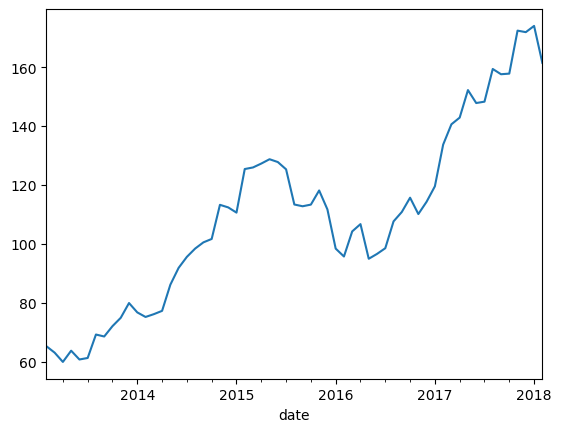

In [46]:
data2['close'].resample('M').mean().plot()

##### resampling close column year wise

<AxesSubplot:xlabel='date'>

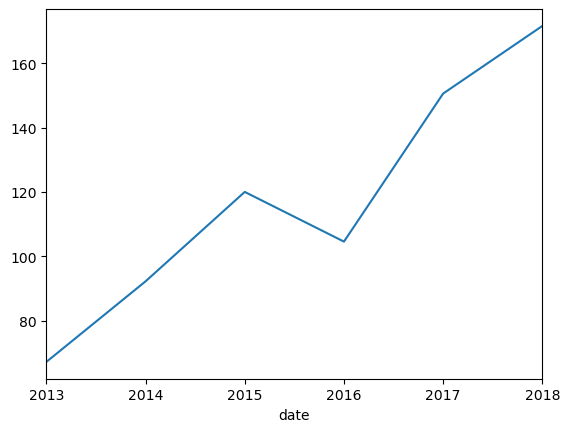

In [47]:
data2['close'].resample('Y').mean().plot()

In [48]:
data2['close'].resample('Q').mean()

date
2013-03-31     64.020291
2013-06-30     61.534692
2013-09-30     66.320670
2013-12-31     75.567478
2014-03-31     76.086293
2014-06-30     85.117475
2014-09-30     98.163311
2014-12-31    108.821016
2015-03-31    120.776721
2015-06-30    127.937937
2015-09-30    117.303438
2015-12-31    114.299297
2016-03-31     99.655082
2016-06-30     99.401250
2016-09-30    105.866094
2016-12-31    113.399048
2017-03-31    131.712500
2017-06-30    147.875397
2017-09-30    155.304603
2017-12-31    167.148254
2018-03-31    171.594231
Freq: Q-DEC, Name: close, dtype: float64

<AxesSubplot:xlabel='date'>

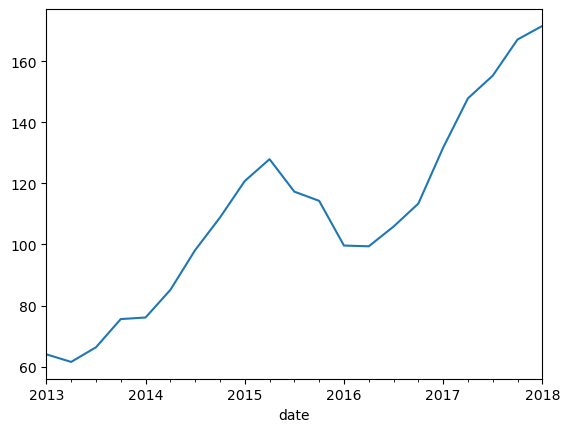

In [87]:
data2['close'].resample('Q').mean().plot()

## 6.. Checking if the closing prices of these tech companies(Amazon,Apple,Google,Microsoft) are correlated or not !

##### ways to do it:
    1.. using loop
    2.. baby/toy approach

In [49]:
data2.head()

open     high      low    close     volume  Name  \
date                                                              
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

            Daily Return (in %)  
date                             
2013-02-08                  NaN  
2013-02-11             1.042235  
2013-02-12            -2.506658  
2013-02-13            -0.190297  
2013-02-14            -0.089934

In [50]:
all_data.head(2)

date   open   high    low  close    volume  Name
0 2013-02-08  27.35  27.71  27.31  27.55  33318306  MSFT
1 2013-02-11  27.65  27.92  27.50  27.86  32247549  MSFT

#### 1..using loop

In [51]:
company_list

['G:\\\\EDA_projects\\\\Stock_Data\\\\individual_stocks_5yr\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'G:\\\\EDA_projects\\\\Stock_Data\\\\individual_stocks_5yr\\\\individual_stocks_5yr\\\\AMZN_data.csv',
 'G:\\\\EDA_projects\\\\Stock_Data\\\\individual_stocks_5yr\\\\individual_stocks_5yr\\\\GOOG_data.csv',
 'G:\\\\EDA_projects\\\\Stock_Data\\\\individual_stocks_5yr\\\\individual_stocks_5yr\\\\MSFT_data.csv']

In [89]:
closing_price = pd.DataFrame()

for index,file in enumerate(company_list,1):
    current_df = pd.read_csv(file)
    closing_price[str(index) + 'price'] = current_df['close']

In [90]:
closing_price.columns=['AAPL_close' , 'AMZN_close' , 'GOOG_close'\
                               , 'MSFT_close']

In [91]:
closing_price.head(4)

AAPL_close  AMZN_close  GOOG_close  MSFT_close
0     67.8542      261.95      558.46       27.55
1     68.5614      257.21      559.99       27.86
2     66.8428      258.70      556.97       27.88
3     66.7156      269.47      567.16       28.03

In [55]:
'''
    Pair-plot is all about , we can considering some pairs & 
    we are trying visualise scatterplot of it..
    pairs-- 5c2-- 10 unique plots
    
    but total-25 ( 10 unique + 10 mirror images of these 
    unique one + 5 diaognal (ie histogram))

'''

# Pair-Plot (pairwise scatter plot)

# Dis-advantages: 
## Can't be used when number of features are high.
## Cannot visualize higher dimensional patterns in 3-D and 4-D. 
## Only possible to view 2D patterns.



# NOTE: the diagnol elements are (histogram) for each feature.

'\n    Pair-plot is all about , we can considering some pairs & we are trying visualise scatterplot of it..\n    pairs-- 5c2-- 10 unique plots\n    \n    but total-25 ( 10 unique + 10 mirror images of these unique one + 5 diaognal (ie histogram))\n\n'

#### Bi-variate Analysis ( 2 features at a time)

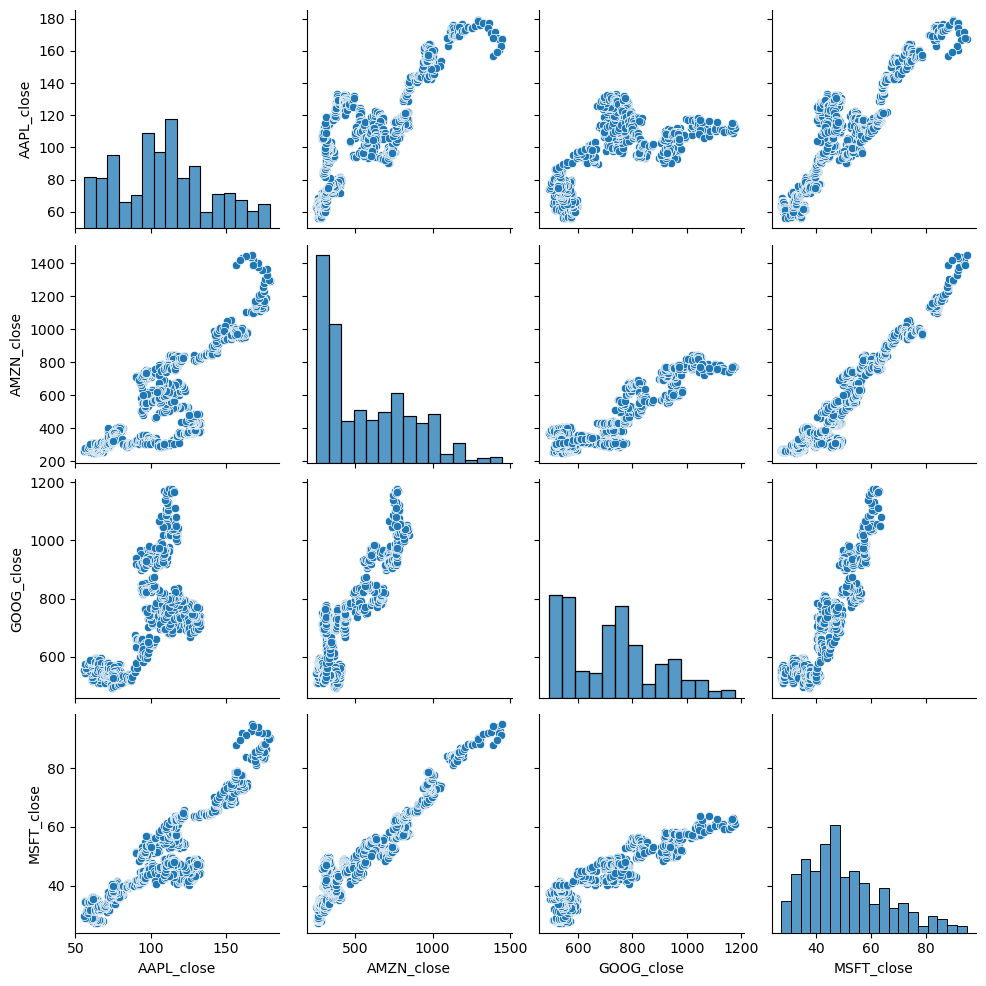

In [56]:
sns.pairplot(data=closing_price)


## scatter-plot matrix .. 
## https://plotly.com/python/splom/

##### co-relation plot for stock prices

<AxesSubplot:>

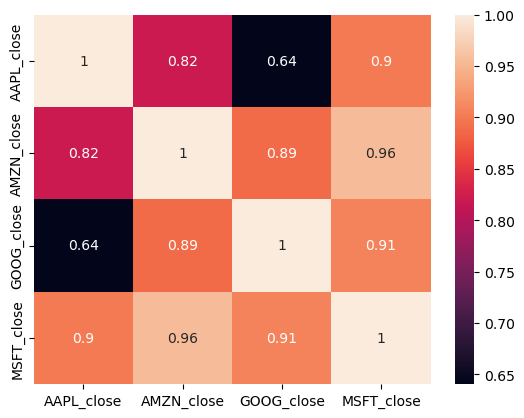

In [57]:
sns.heatmap(closing_price.corr(),annot=True)

##### Closing price of Google and Microsoft are well correlated
       and Closing price of Amazon and Microsoft have a co-relation of 0.96


##  7.. analyse Whether Daily change in Closing price of stocks or Daily Returns in Stock are co-related or not !

In [58]:
closing_price 

AAPL_close  AMZN_close  GOOG_close  MSFT_close
0        67.8542      261.95      558.46       27.55
1        68.5614      257.21      559.99       27.86
2        66.8428      258.70      556.97       27.88
3        66.7156      269.47      567.16       28.03
4        66.6556      269.24      567.00       28.04
...          ...         ...         ...         ...
1254    167.7800     1390.00         NaN       94.26
1255    160.5000     1429.95         NaN       91.78
1256    156.4900     1390.00         NaN       88.00
1257    163.0300     1442.84         NaN       91.33
1258    159.5400     1416.78         NaN       89.61

[1259 rows x 4 columns]

In [59]:
(closing_price['AAPL_close'] - closing_price['AAPL_close'].shift(1))
                        /closing_price['AAPL_close'].shift(1) * 100

##  closing_price['AAPL_close'].pct_change()*100

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: AAPL_close, Length: 1259, dtype: float64

In [92]:
for col in closing_price.columns:
    closing_price[col+'_pct_change'] = (closing_price[col] - \
    closing_price[col].shift(1))/closing_price[col].shift(1) * 100
    
    

In [93]:
closing_price.head(2)

AAPL_close  AMZN_close  GOOG_close  MSFT_close  AAPL_close_pct_change  \
0     67.8542      261.95      558.46       27.55                    NaN   
1     68.5614      257.21      559.99       27.86               1.042235   

   AMZN_close_pct_change  GOOG_close_pct_change  MSFT_close_pct_change  
0                    NaN                    NaN                    NaN  
1              -1.809506               0.273968               1.125227

In [62]:
closing_price.columns

Index(['AAPL_close', 'AMZN_close', 'GOOG_close', 'MSFT_close',
       'AAPL_close_pct_change', 'AMZN_close_pct_change',
       'GOOG_close_pct_change', 'MSFT_close_pct_change'],
      dtype='object')

In [94]:
clsing_p = closing_price[['AAPL_close_pct_change','AMZN_close_pct_change',\
                          'GOOG_close_pct_change','MSFT_close_pct_change']]

## clsing_p = closing_price[closing_price.columns[-4:]]

In [95]:
clsing_p.head(4)

AAPL_close_pct_change  AMZN_close_pct_change  GOOG_close_pct_change  \
0                    NaN                    NaN                    NaN   
1               1.042235              -1.809506               0.273968   
2              -2.506658               0.579293              -0.539295   
3              -0.190297               4.163123               1.829542   

   MSFT_close_pct_change  
0                    NaN  
1               1.125227  
2               0.071788  
3               0.538020

In [65]:
### we can think of using following plots:

### Jointplot
### scatterplot
### pairplot

## Jointgrid
## Pairgrid 

In [66]:
### since we have used Pairplot already , lets use extension of Pairplot , ie Pairgrid :

In [67]:
'''
Pairplot : we have histogram on diagonals & scatterplot/kde/
            any_other_plot which tells dist.. on rest of the plot 


Pairgrid : Once we create grid , we can set plot as per our need : 

ie , it creates total 16 graphs(grid/graphs) or matrices of 4*4
ie , Pairgrid = total_features_on_rows * total_features_on_cols


    let say :

    a) all plots must be scatterplot
    b) on diagonal , we have histogram & rest will be scatterplot
    c) on diagonal , we have histogram & rest will be kdeplot 
    c) on diagonal , we have histogram & below diagonal will be kdeplot
            & upper diagonal will be scatterplot 

kdeplot for 2 features also known as contour plots 
but kdeplot returns distribution if we are performing univariate analysis else it will show density ..

'''

'\nPairplot : we have histogram on diagonals & scatterplot/kde/any_other_plot which tells dist.. on rest of the plot \n\n\nPairgrid : Once we create grid , we can set plot as per our need : \n\nie , it creates total 16 graphs(grid/graphs) or matrices of 4*4\nie , Pairgrid = total_features_on_rows * total_features_on_cols\n\n\n    let say :\n\n    a) all plots must be scatterplot\n    b) on diagonal , we have histogram & rest will be scatterplot\n    c) on diagonal , we have histogram & rest will be kdeplot \n    c) on diagonal , we have histogram & below diagonal will be kdeplot & upper diagonal will be scatterplot \n\n\n'

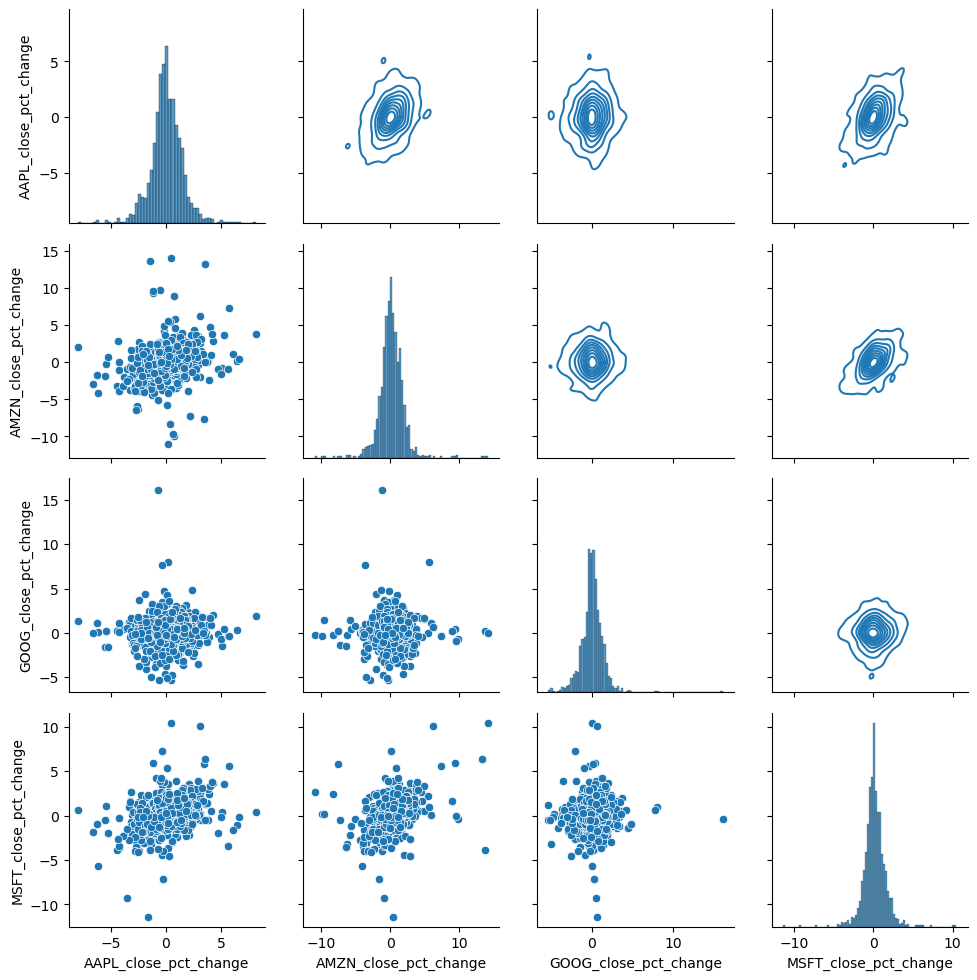

In [68]:
g = sns.PairGrid(data=clsing_p)

g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

In [ ]:
# Comparing 'AAPL_close_pct_change' to 'AMZN_close_pct_change' 
# should show a perfectly linear relationship

In [70]:
closing_price[closing_price.columns[-4:]].corr()

AAPL_close_pct_change  AMZN_close_pct_change  \
AAPL_close_pct_change               1.000000               0.287659   
AMZN_close_pct_change               0.287659               1.000000   
GOOG_close_pct_change               0.036202               0.027698   
MSFT_close_pct_change               0.366598               0.402678   

                       GOOG_close_pct_change  MSFT_close_pct_change  
AAPL_close_pct_change               0.036202               0.366598  
AMZN_close_pct_change               0.027698               0.402678  
GOOG_close_pct_change               1.000000               0.038939  
MSFT_close_pct_change               0.038939               1.000000

##### so just to understand above co-relation more:
    1..u can think of using heatmap (go with seaborn)
    2..u can think of using styling this dataframe (go with pandas)

<AxesSubplot:>

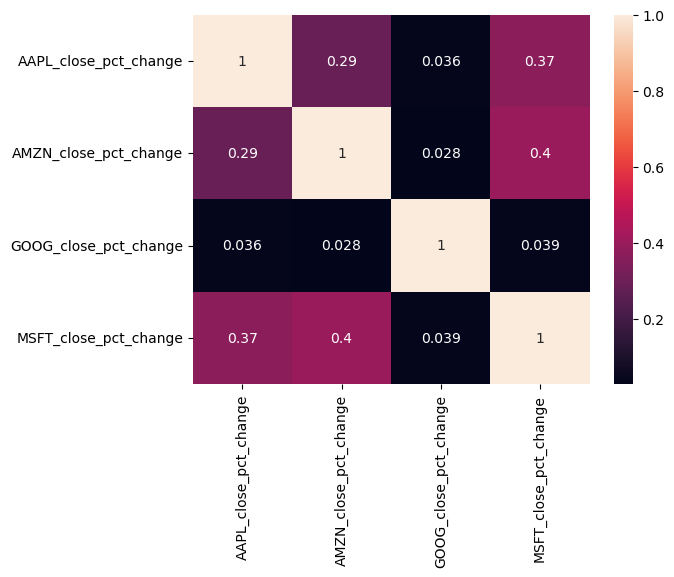

In [71]:
sns.heatmap(closing_price[closing_price.columns[-4:]].corr(),\
                                annot=True)

In [72]:
cor=closing_price[closing_price.columns[-4:]].corr()
cor.style.background_gradient()


#### We can see that Amazon and microsoft have good correlation on percentage change in Closing price..
     Ie If amazon stock price decreases , then there is 40% prob that MSFT prices also decreases & vice-cersa !

## 8.. Value at Risk analysis for Apple

In [73]:
import seaborn as sns

<AxesSubplot:xlabel='AAPL_close_pct_change', ylabel='Density'>

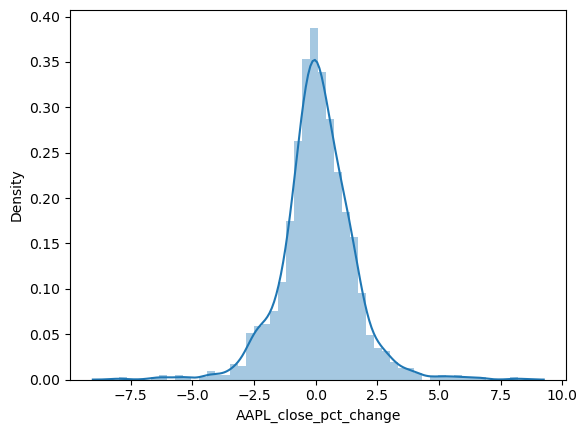

In [74]:
sns.distplot(closing_price['AAPL_close_pct_change'])

## sns.displot(closing_price['AAPL_close_pct_change'] , kind='kde')

In [ ]:
'''
we can achieve distribution plot by smoothening our histogram using KDE ie PDF is a smoothen form of your histogram !
ie histogram -->> apply KDE -->> we will get distribution plot 



This is called density plot bcz here height represents how many pts exists at each of these intervals or how dense 
each of the region is !



density(distribution) plot : at a point , what is a density of a data pt. ?
                or
how many percentage of data pts available at some particular pt .. ?
                or 
What is the % of data points that I will encounter at any point ? 
                or
what is the probability of certain data pt in whole data ?
                or 
prob that my data has value has some specific value 

'''

##### it somehow follows a normal distribution

In [75]:
closing_price['AAPL_close_pct_change'].std()

1.4593012249654727

In [76]:
closing_price['AAPL_close_pct_change'].quantile(0.1)

-1.554812796087261

    Conclusion-->> -1.5548127960872604 means that 90% of the times the 
                    daily Loss will not exceed 1.55 !

In [77]:
closing_price.describe().T

count        mean         std         min         25%  \
AAPL_close             1259.0  109.066698   30.556812   55.789900   84.830650   
AMZN_close             1259.0  576.880041  282.500395  248.230000  325.800000   
GOOG_close              975.0  725.403353  166.420529  492.550000  564.785000   
MSFT_close             1259.0   51.063081   14.852117   27.370000   40.310000   
AAPL_close_pct_change  1258.0    0.078620    1.459301   -7.992722   -0.639654   
AMZN_close_pct_change  1258.0    0.150753    1.823479  -10.997246   -0.704732   
GOOG_close_pct_change   974.0    0.074459    1.406871   -5.317860   -0.571235   
MSFT_close_pct_change  1258.0    0.103887    1.421017  -11.399549   -0.583200   

                              50%         75%          max  
AAPL_close             109.010000  127.120000   179.260000  
AMZN_close             503.820000  777.420000  1450.890000  
GOOG_close             720.640000  823.330000  1175.840000  
MSFT_close              47.520000   59.730000    95.010000  
AAPL_close_pct_change    0.043470    0.863101     8.198180  
AMZN_close_pct_change    0.105022    1.080120    14.131132  
GOOG_close_pct_change    0.055096    0.775443    16.052427  
MSFT_close_pct_change    0.047086    0.775140    10.452238

# 9.. Analysing open , high  , low  , close value of stocks of apple stocks
    try out candle-stick/ohlc charts ! , both are same ..
    


In [79]:
apple = pd.read_csv(r'G:\EDA_projects\Stock_Data\individual_stocks_5yr\
                        individual_stocks_5yr/AAPL_data.csv')

In [80]:
apple.head(2)

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL

In [ ]:
### think for candle-stick plots !

In [81]:
import plotly.graph_objects as go

In [83]:
data = apple[0:50]

In [84]:
from plotly.offline import download_plotlyjs, init_notebook_mode, 
plot, iplot , init_notebook_mode(connected=True)

In [85]:
trace=go.Candlestick(x=data['date'],
                open=data['open'],
                high=data['high'],
                low=data['low'],
                close=data['close'])

layout = {
    'title': 'stock Historical Price <br> <i>A closer look </i>',
    'xaxis': {'title': 'Date'},
    'yaxis': {'title': 'Stock Price daily distribution (USD$)'}
}

In [86]:
data = [trace]

fig = go.Figure(data=data, layout=layout)
iplot(fig)


In [ ]:
### if we want to disable rangeslider :

In [ ]:
'''


fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'])
                     ])
                     
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()


'''
## or 



'''

trace=go.Candlestick(x=df['date'],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'])

layout = {
    'title': 'Amazon Historical Price <br> <i>A closer look to the upward trend </i>',
    'xaxis': {'title': 'Date',
             'rangeslider': {'visible': False}},
    'yaxis': {'title': 'Stock Price (USD$)'}
    
    
    
data = [trace]

fig = go.Figure(data=data, layout=layout)
iplot(fig)
}
'''

### Try out Candle-stack in Dash : 